In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 10)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Setting default number of Parallel threads to 10.



In [3]:
PROJDIR='../../../data/raw_data/rheMac10/Stauffer_caudate'
ARCHDIR=file.path(PROJDIR,'ArchR_Stauffer_caudate')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Make plots

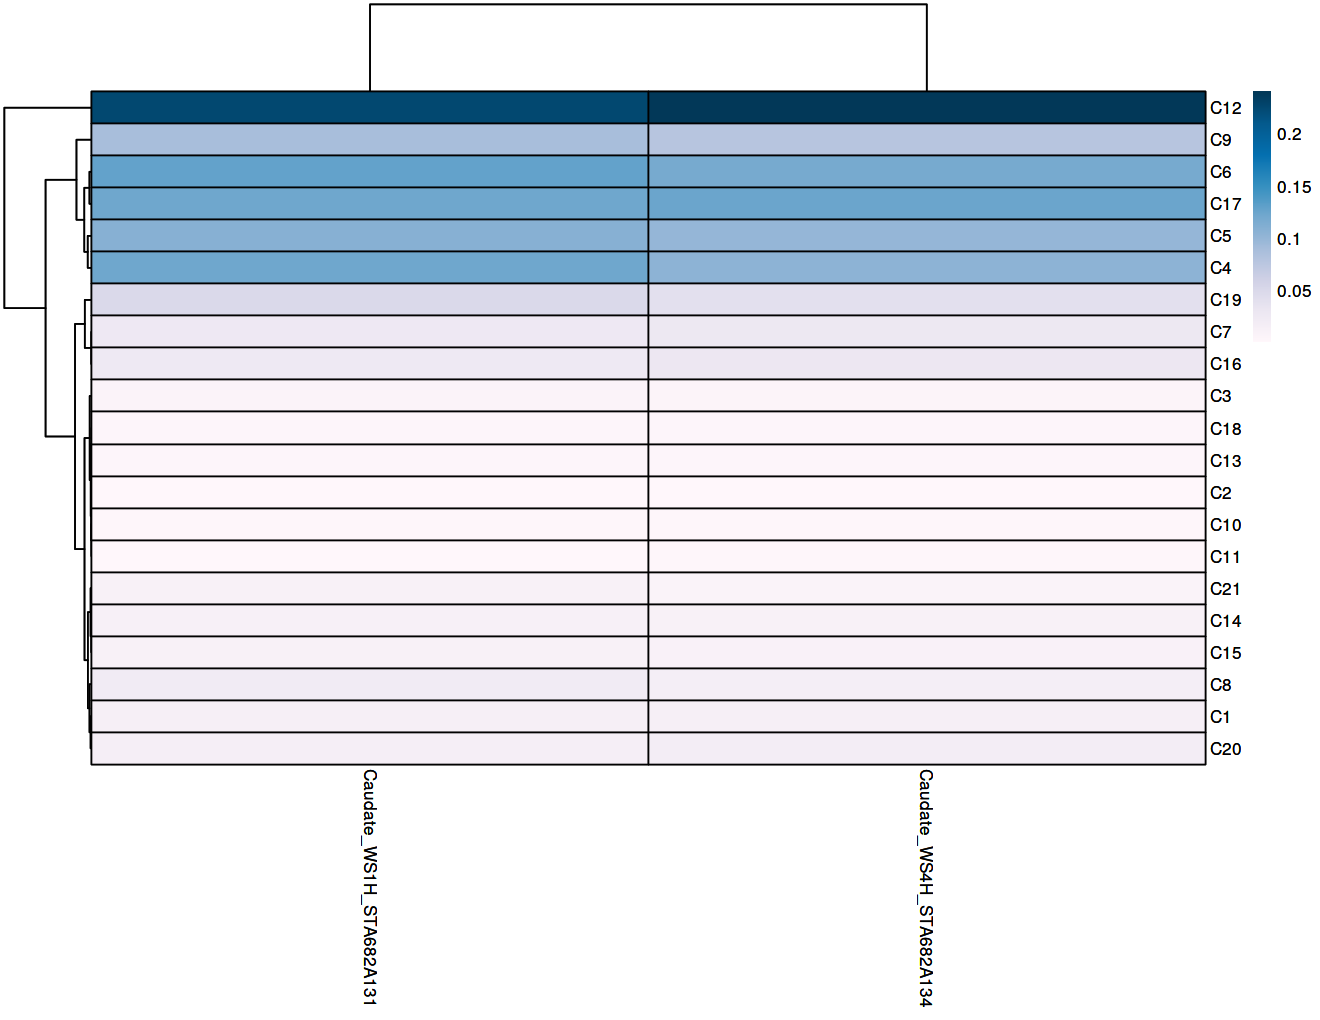

In [4]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$ClustersI150), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a4d2ba731-Date-2021-02-03_Time-11-00-12.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a4d2ba731-Date-2021-02-03_Time-11-00-12.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a59ac0ceb-Date-2021-02-03_Time-11-00-21.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a59ac0ceb-Date-2021-02-03_Time-11-00-21.log



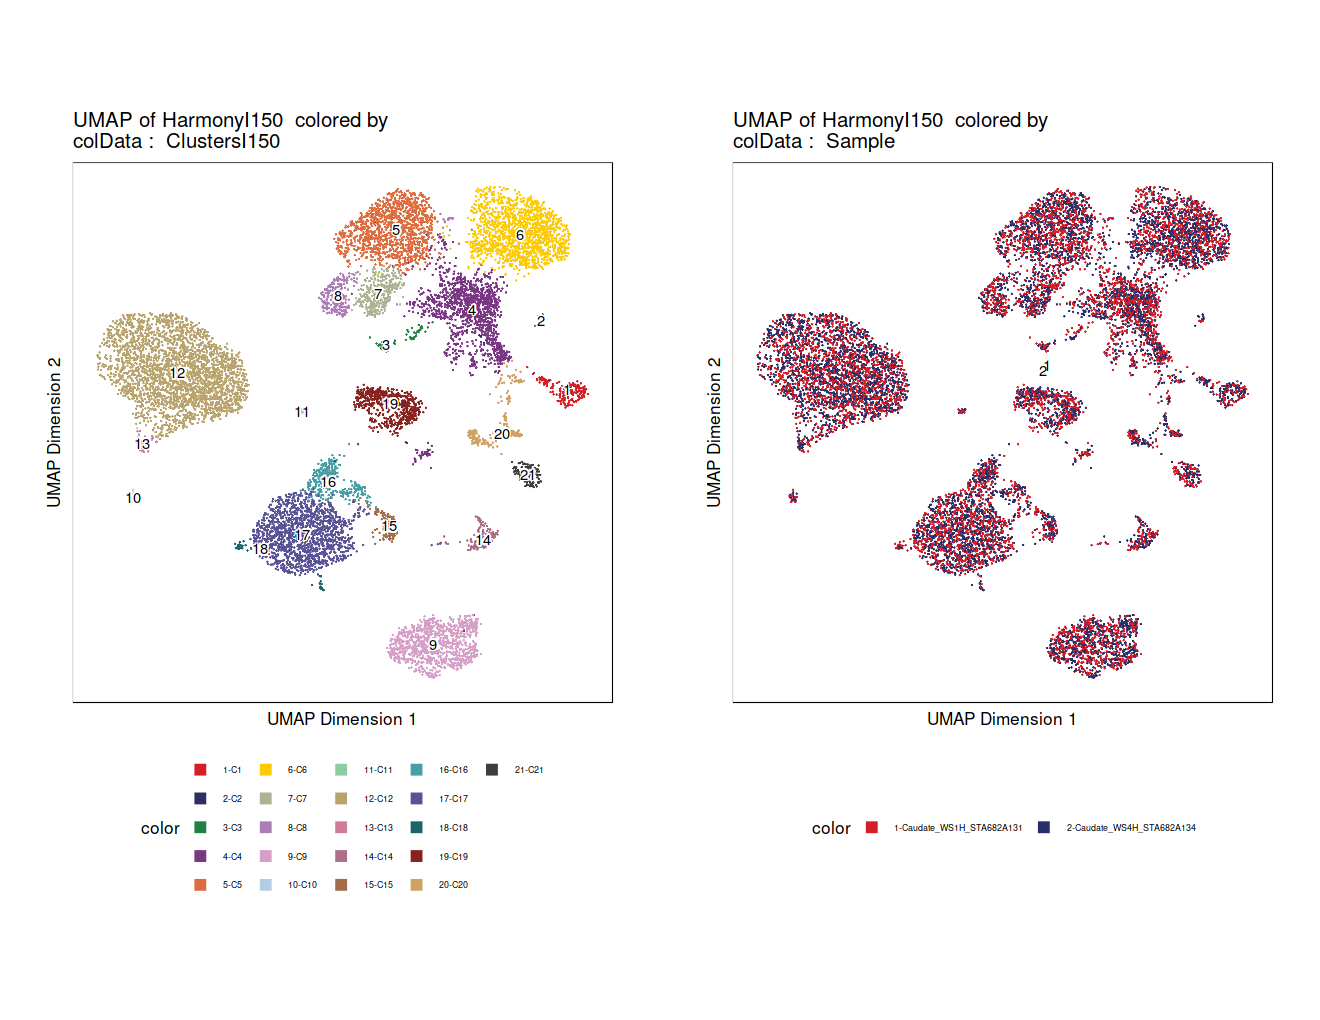

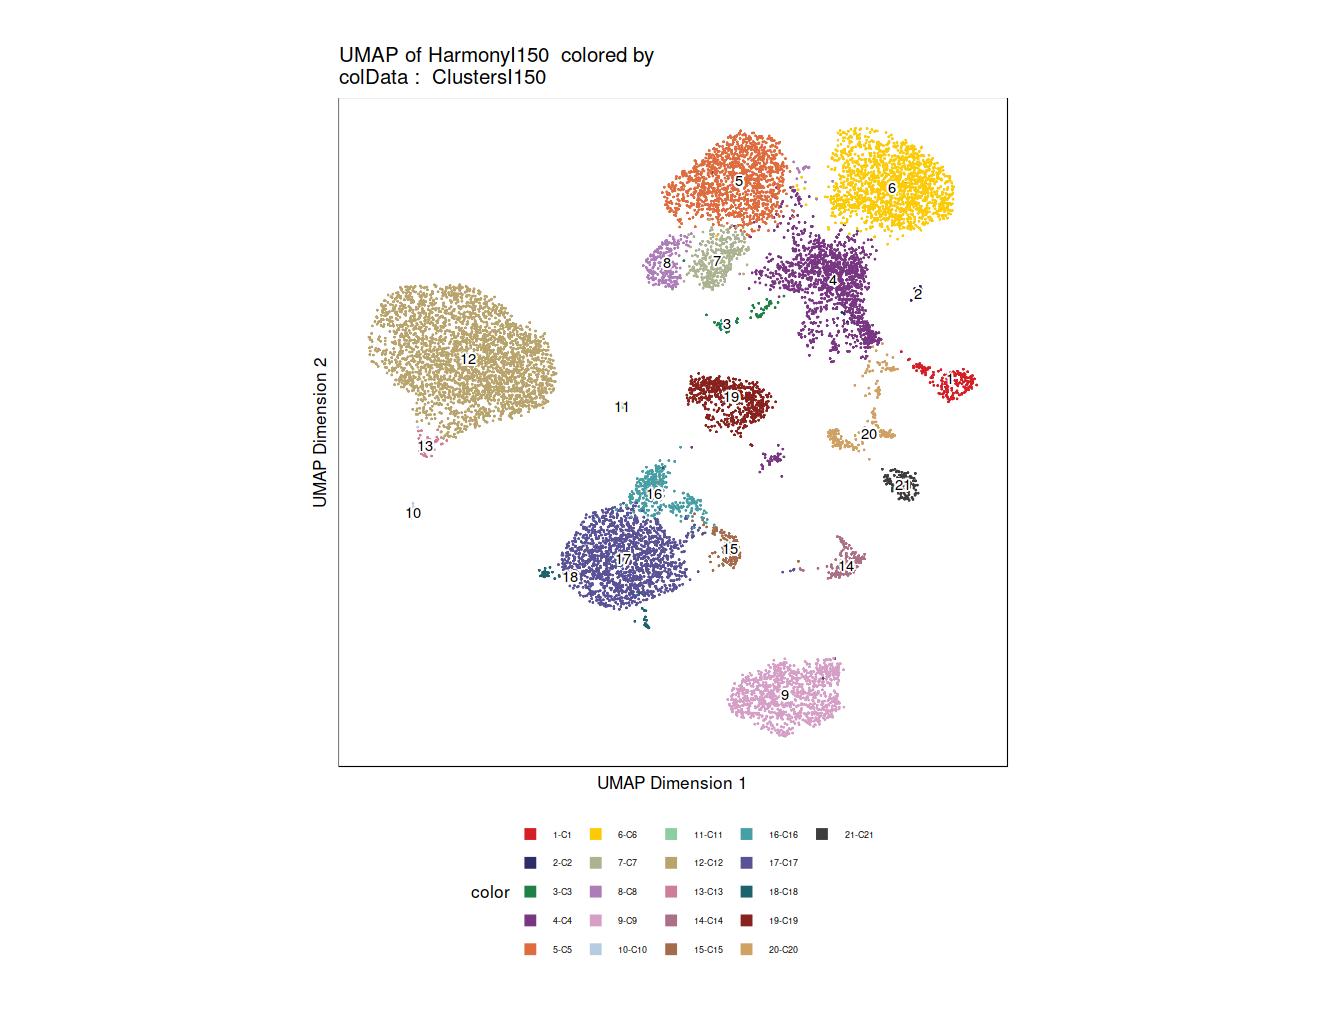

In [5]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersI150", embedding = "UMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sample", embedding = "UMAP")

ggAlignPlots(p1, p2, type = "h")
p1

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a7b39123b-Date-2021-02-03_Time-11-00-29.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-02-03 11:00:29 : 



Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a7b39123b-Date-2021-02-03_Time-11-00-29.log



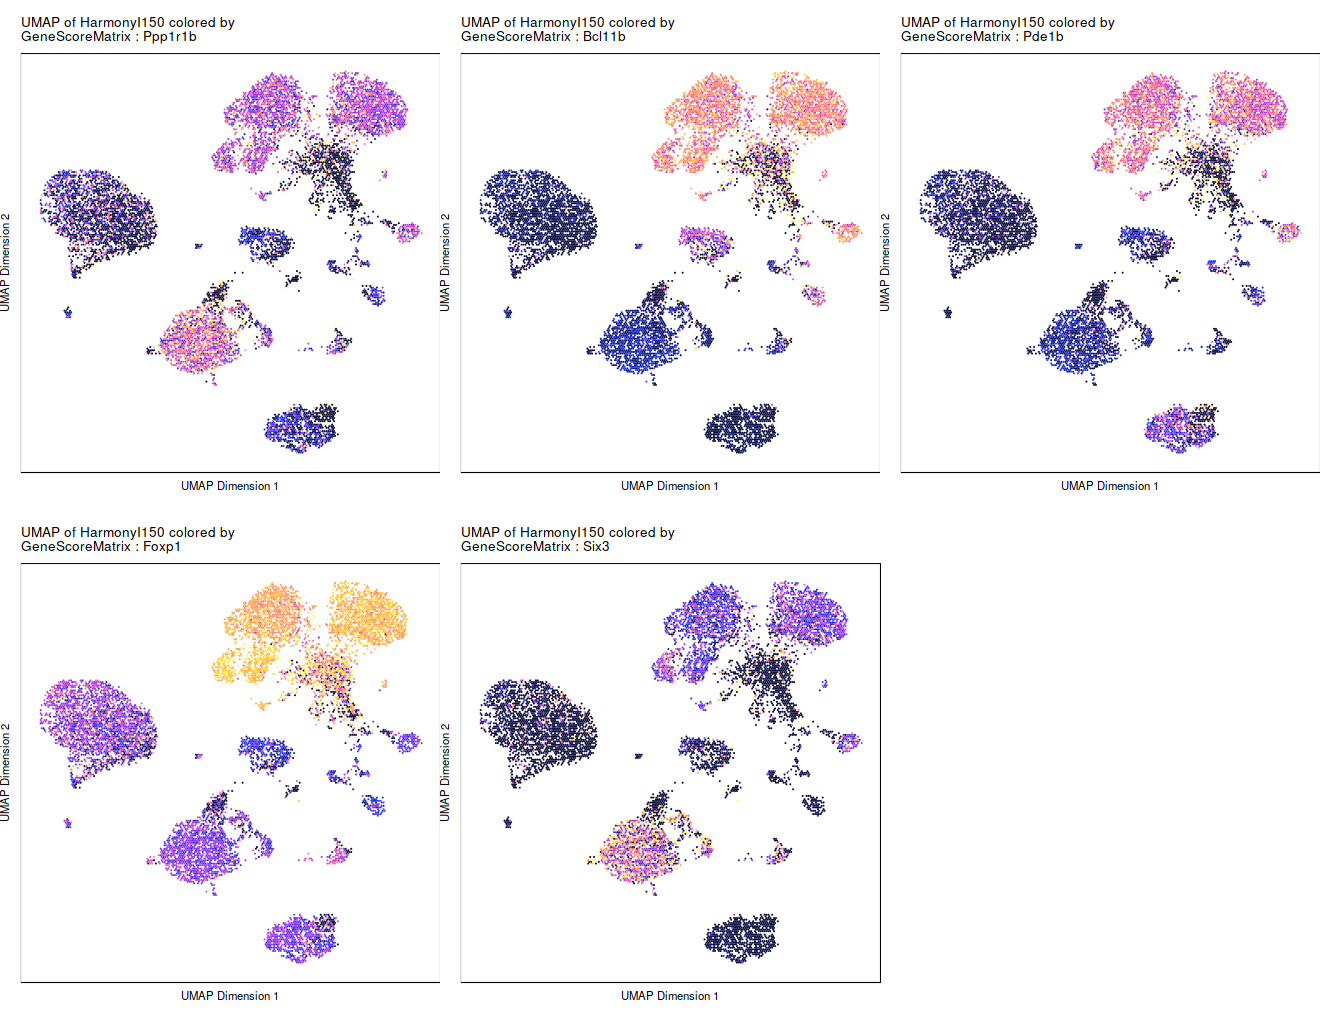

In [6]:
# Broad MSN marker, mouse 2010300C02Rik == human KIAA1211L
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('Ppp1r1b','Bcl11b','Pde1b','Foxp1','Six3' )
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAP", imputeWeights = NULL)
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a4e7dd719-Date-2021-02-03_Time-11-00-40.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-02-03 11:00:41 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a4e7dd719-Date-2021-02-03_Time-11-00-40.log



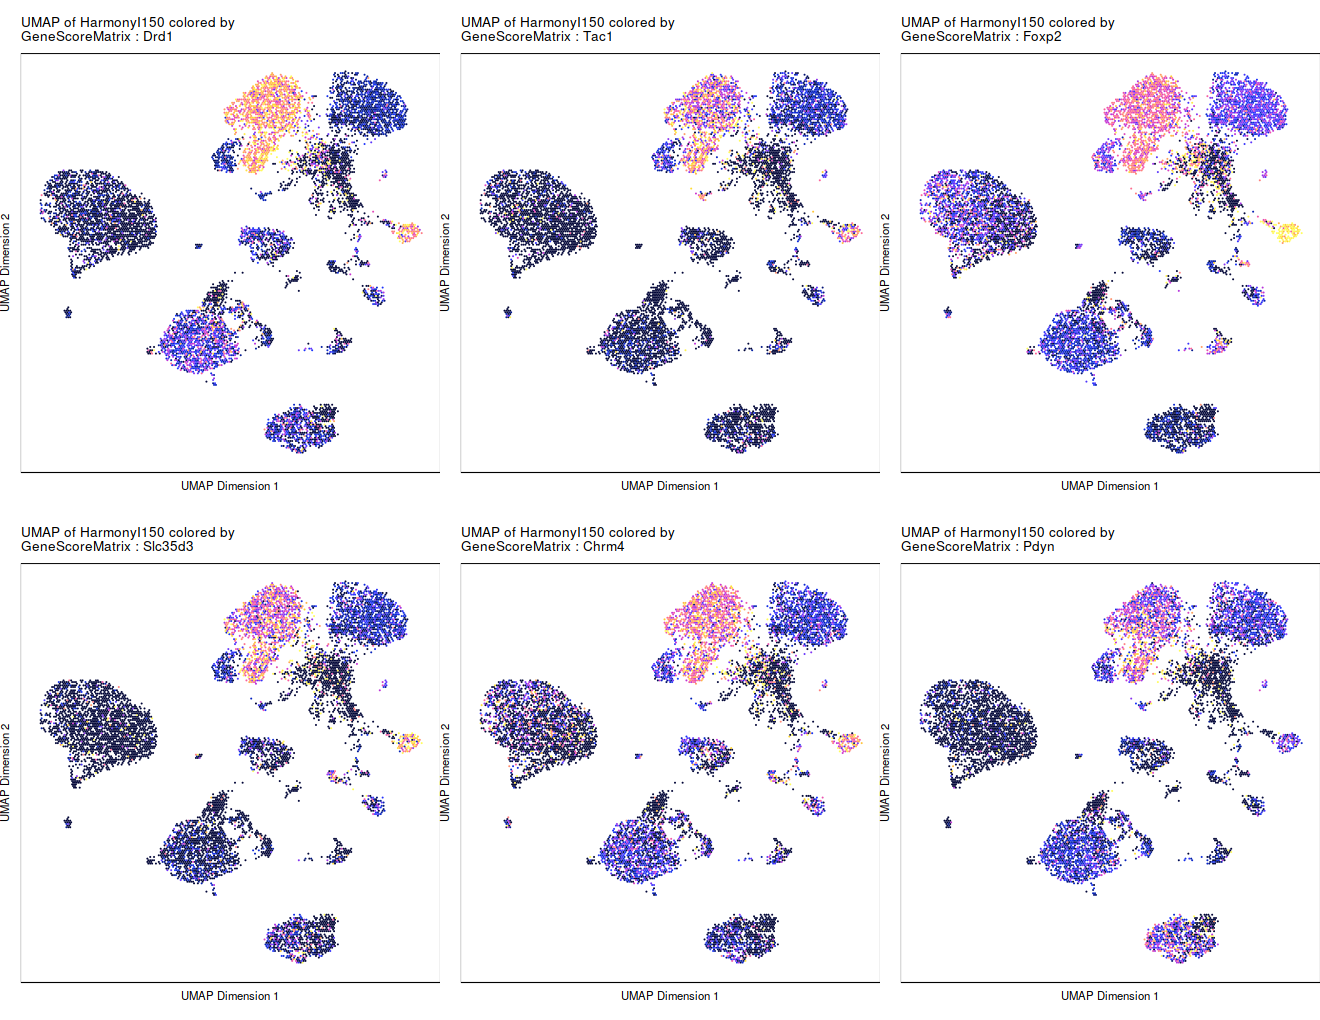

In [7]:
markMSN1 = c('Drd1','Tac1','Foxp2','Slc35d3','Chrm4', 'Pdyn') # D1 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAP", imputeWeights = NULL) # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a2ccad4-Date-2021-02-03_Time-11-00-53.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-02-03 11:00:53 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a2ccad4-Date-2021-02-03_Time-11-00-53.log



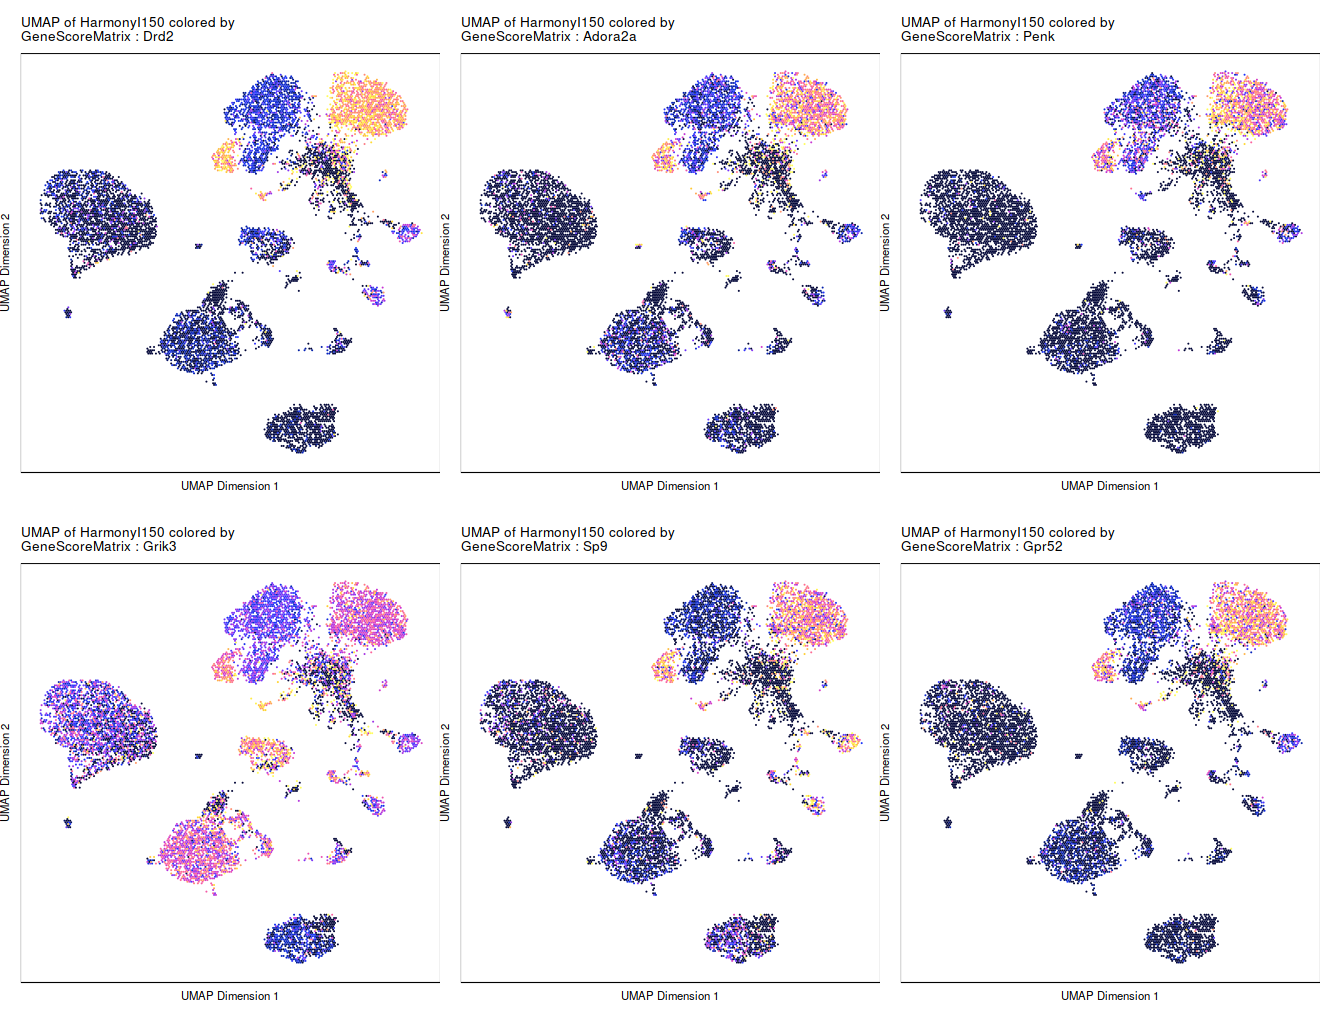

In [8]:
markMSN2 = c('Drd2','Adora2a','Penk', 'Grik3', 'Sp9', 'Gpr52')# D2 markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAP", imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
          axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p2))


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a4137bde2-Date-2021-02-03_Time-11-01-04.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-02-03 11:01:05 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a4137bde2-Date-2021-02-03_Time-11-01-04.log



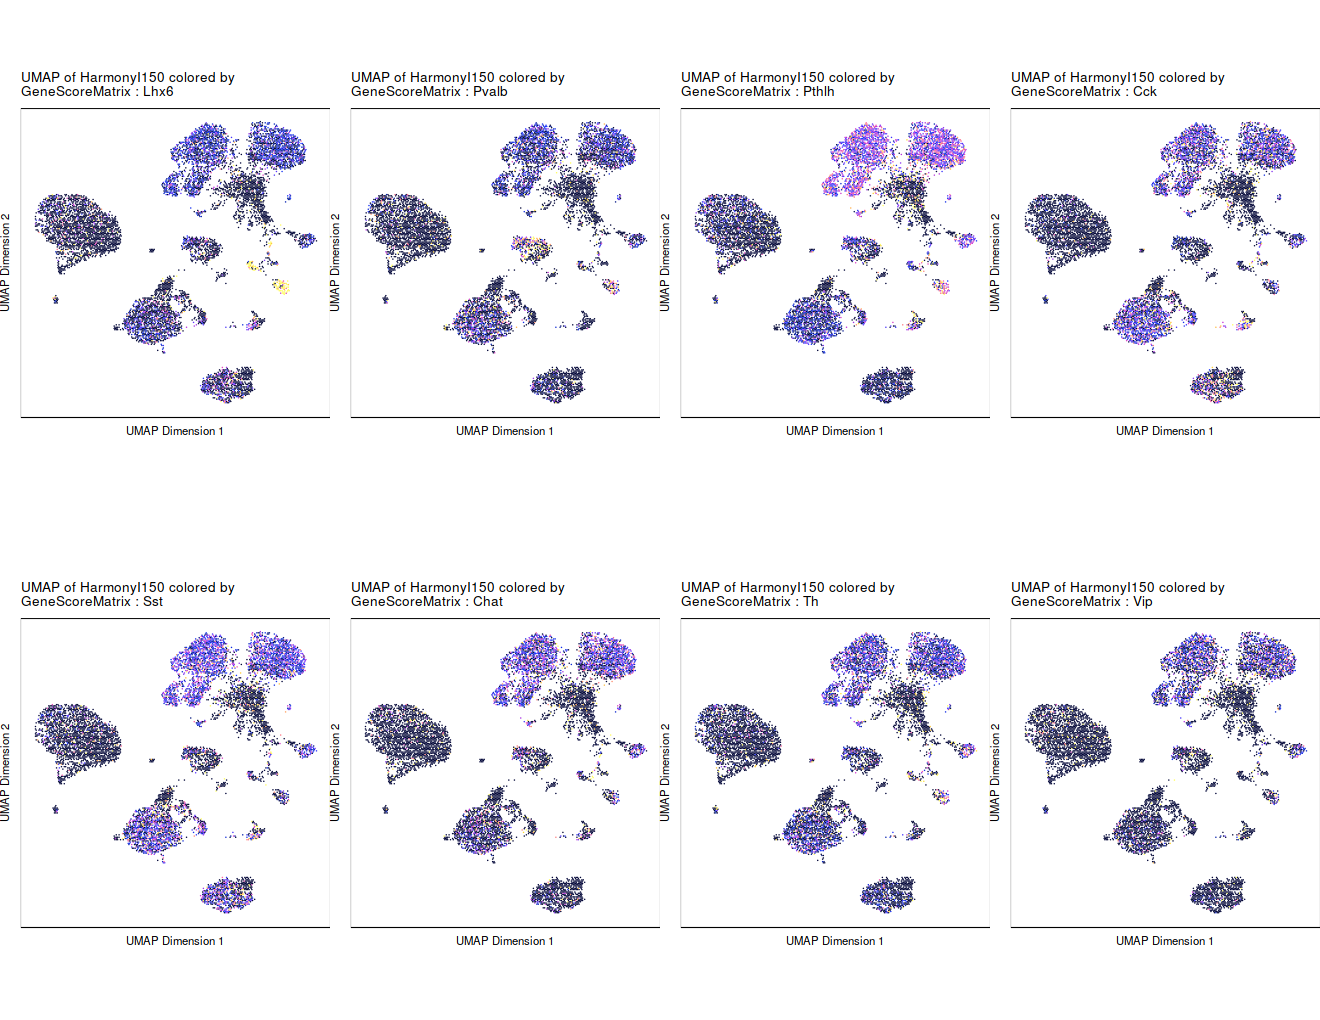

In [9]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'Pthlh','Cck','Sst', 'Chat','Th', 'Vip') # Interneuron markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", imputeWeights = NULL,
                    name = markerGenes1, embedding = "UMAP")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a173c3716-Date-2021-02-03_Time-11-01-17.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-02-03 11:01:17 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a173c3716-Date-2021-02-03_Time-11-01-17.log



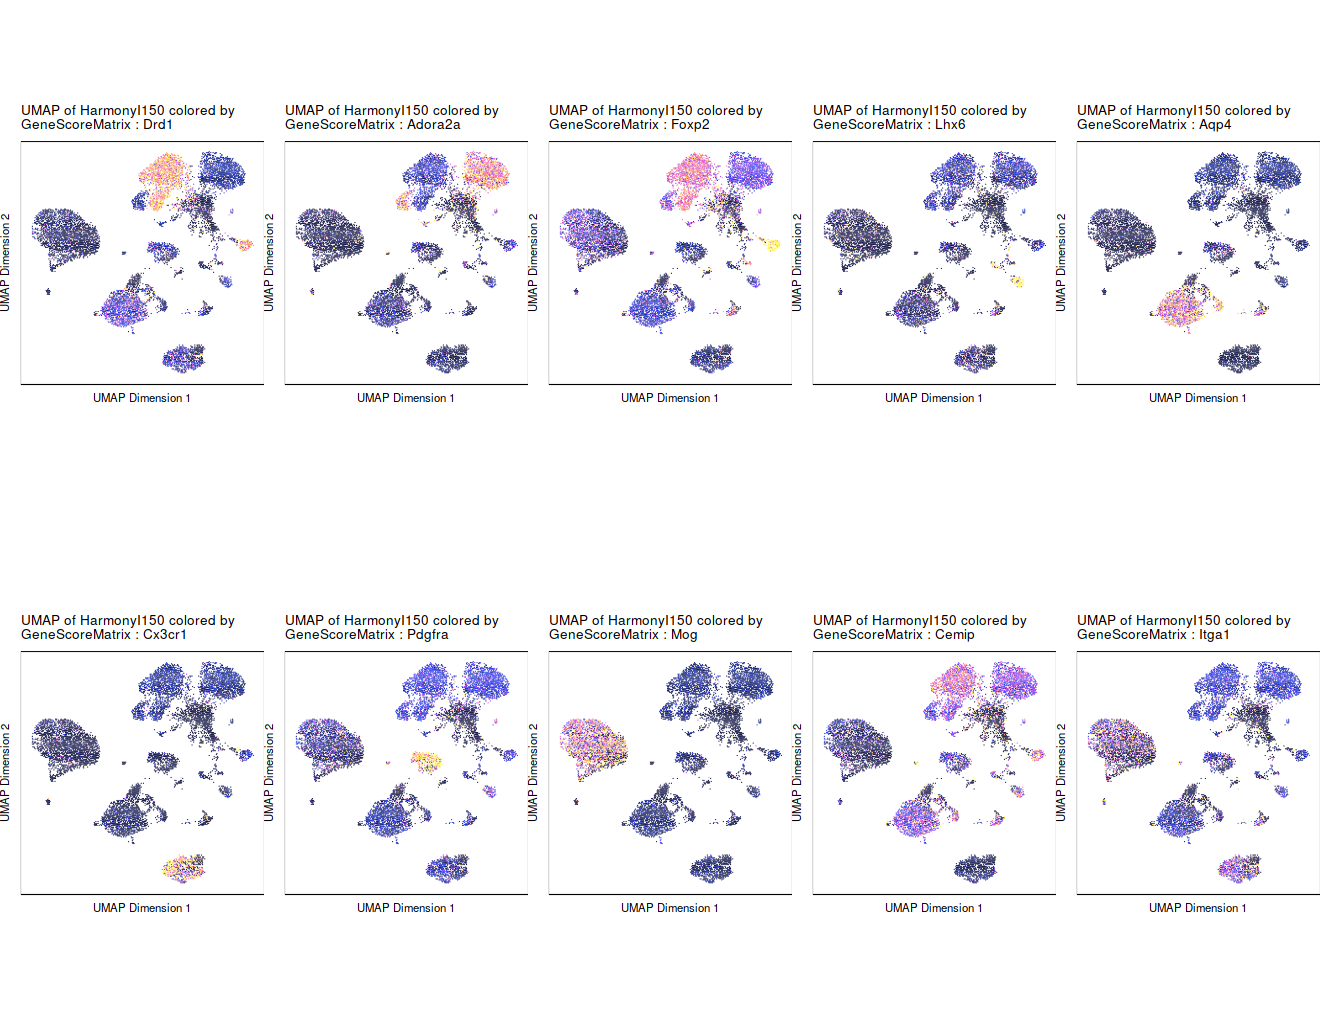

In [10]:
## Neuron vs. Glia markers
markerGenes1  <- c('Drd1', # D1 MSN
                   'Adora2a', #D2 MSN
                   'Foxp2', # Striatonigral MSN
                   'Lhx6', #Interneuron
                   'Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog' ,# Oligo,
                   'Cemip', # mural-fibroblast like
                   'Itga1' # endothelia
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAP", imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a4ee19100-Date-2021-02-03_Time-11-01-32.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a4ee19100-Date-2021-02-03_Time-11-01-32.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a1f91c319-Date-2021-02-03_Time-11-01-32.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a1f91c319-Date-2021-02-03_Time-11-01-32.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a1fc0867f-Date-2021-02-03_Time-11-01-33.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to :

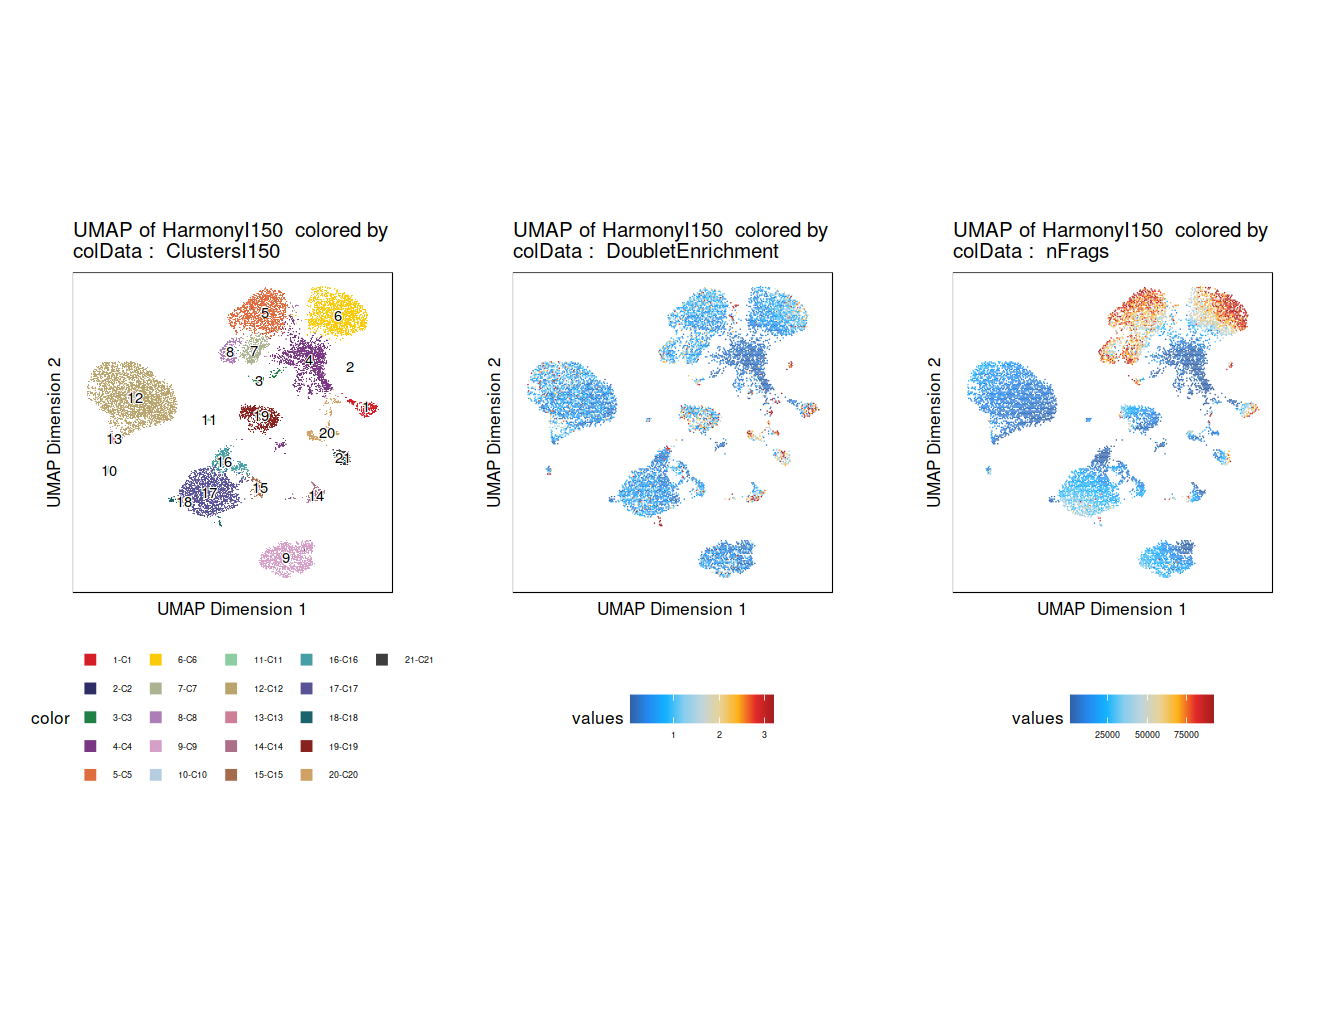

In [11]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersI150", embedding = "UMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAP")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "nFrags", embedding = "UMAP")

ggAlignPlots(p1, p2,p3, type = "h")

# Relabel cluster and call peaks

In [12]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
    'C1' = 'MSN_SN',
    'C2' = 'Drop', # doublet
    'C3' = 'UNK1',
    'C4' = 'Drop', # slushbucket MSNs, low frag cells
    'C5' = 'MSN_D1',
    'C6' = 'MSN_D2',
    'C7' = 'MSN_D1',
    'C8' = 'MSN_D2',
    'C9' = 'Microglia',
    'C10'= 'Drop',
    'C11'= 'UNK2',
    'C12'= 'Oligo',
    'C13'= 'Oligo',
    'C14'= 'UNK3',
    'C15'= 'Astro',
    'C16'= 'Drop',
    'C17'= 'Astro',
    'C18'= 'Drop',
    'C19'= 'OPC',
    'C20'= 'INT_UNK',
    'C21'= 'INT_Pvalb'
)
proj$Clusters2 <- mapLabels(proj$ClustersI150, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Clusters2)
proj = saveArchRProject(ArchRProj = proj)


    Astro      Drop INT_Pvalb   INT_UNK Microglia    MSN_D1    MSN_D2    MSN_SN 
     1665      1861       127       221      1028      1635      1763       192 
    Oligo       OPC      UNK1      UNK2      UNK3 
     2901       556        87        31       159 

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a11e1e0e3-Date-2021-02-03_Time-11-01-40.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a11e1e0e3-Date-2021-02-03_Time-11-01-40.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a7b8aa23d-Date-2021-02-03_Time-11-01-41.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a7b8aa23d-Date-2021-02-03_Time-11-01-41.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-40d2a68da0703-Date-2021-02-03_Time-11-01-41.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-40d2a68da0703-Date-2021-02-03_Ti

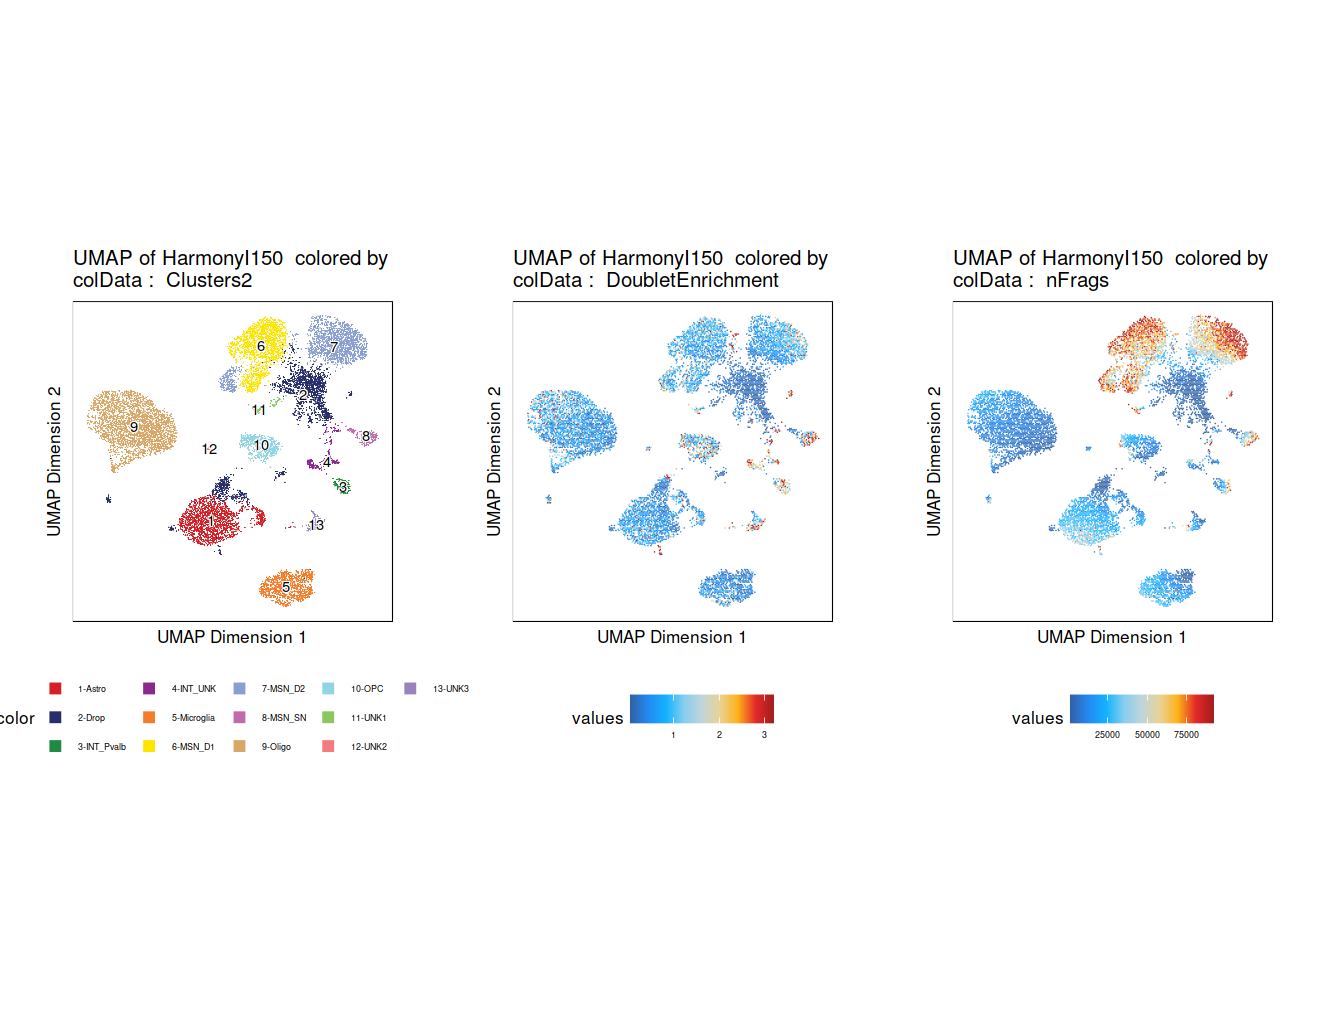

In [13]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters2", embedding = "UMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAP")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "nFrags", embedding = "UMAP")

ggAlignPlots(p1, p2,p3, type = "h")

In [14]:
# drop the drop clusters
ARCHDIR2=file.path(PROJDIR,'ArchR_Stauffer_caudate_labeled')
idxSample <- BiocGenerics::which(! grepl('Drop|UNK', proj$Clusters2)  )
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/machineLearningForComputationalBiology/snATAC_cross_species_caudate/data/raw_data/rheMac10/Stauffer_caudate/ArchR_Stauffer_caudate_labeled

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
           

In [15]:
# make group coverage, call peaks, and 
proj2<-addGroupCoverages(proj2, groupBy="Clusters2", force = TRUE)
proj2 = saveArchRProject(ArchRProj = proj2)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-40d2a57ecb21d-Date-2021-02-03_Time-11-09-22.log
If there is an issue, please report to github with logFile!

Astro (1 of 8) : CellGroups N = 2

INT_Pvalb (2 of 8) : CellGroups N = 2

Microglia (3 of 8) : CellGroups N = 2

MSN_D1 (4 of 8) : CellGroups N = 2

MSN_D2 (5 of 8) : CellGroups N = 2

MSN_SN (6 of 8) : CellGroups N = 2

Oligo (7 of 8) : CellGroups N = 2

OPC (8 of 8) : CellGroups N = 2

2021-02-03 11:09:23 : Further Sampled 4 Groups above the Max Fragments!, 0.02 mins elapsed.

2021-02-03 11:09:24 : Creating Coverage Files!, 0.026 mins elapsed.

2021-02-03 11:09:24 : Batch Execution w/ safelapply!, 0.026 mins elapsed.

2021-02-03 11:15:53 : Adding Kmer Bias to Coverage Files!, 6.513 mins elapsed.

Completed Kmer Bias Calculation

Adding Kmer Bias (1 of 16)

Adding Kmer Bias (2 of 16)

Adding Kmer Bias (3 of 16)

Adding Kmer Bias (4 of 16)

Adding Kmer Bias (5 of 16)

Adding Kmer Bias (6 of 16)

Adding Kmer Bias (7 of 16)

Add

In [16]:
# call peaks 
proj2<-addReproduciblePeakSet(proj2, groupBy = "Clusters2", plot = FALSE, genomeSize = 2.7e9)
proj2 = saveArchRProject(ArchRProj = proj2)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-40d2a21ad04e-Date-2021-02-03_Time-11-23-34.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2021-02-03 11:23:34 : Peak Calling Parameters!, 0.004 mins elapsed.



              Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
Astro         Astro   1665       1000           2  500  500   150000
INT_Pvalb INT_Pvalb    127        127           2   53   74    63500
Microglia Microglia   1028        997           2  497  500   150000
MSN_D1       MSN_D1   1635       1000           2  500  500   150000
MSN_D2       MSN_D2   1763       1000           2  500  500   150000
MSN_SN       MSN_SN    192        192           2   92  100    96000
Oligo         Oligo   2901       1000           2  500  500   150000
OPC             OPC    556        556           2  256  300   150000


2021-02-03 11:23:34 : Batching Peak Calls!, 0.004 mins elapsed.

2021-02-03 11:23:35 : Batch Execution w/ safelapply!, 0 mins elapsed.

2021-02-03 12:16:57 : Identifying Reproducible Peaks!, 53.372 mins elapsed.

2021-02-03 12:18:06 : Creating Union Peak Set!, 54.528 mins elapsed.

Converged after 6 iterations!

2021-02-03 12:18:14 : Finished Creating Union Peak Set (391927)!, 54.666 mins elapsed.

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /               

In [17]:
# add peak counts matrix 
proj2 <- addPeakMatrix(proj2)
proj2 = saveArchRProject(ArchRProj = proj2)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-40d2a7d59c1d3-Date-2021-02-03_Time-12-18-21.log
If there is an issue, please report to github with logFile!

2021-02-03 12:18:22 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-40d2a7d59c1d3-Date-2021-02-03_Time-12-18-21.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     |

In [18]:
# add motif enrichment matrix
proj2 <- addMotifAnnotations(ArchRProj = proj2, motifSet = "JASPAR2018", name = "Motif")
proj2 = saveArchRProject(ArchRProj = proj2)

No methods found in package ‘IRanges’ for request: ‘score’ when loading ‘TFBSTools’

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-40d2a7b4babdd-Date-2021-02-03_Time-12-22-44.log
If there is an issue, please report to github with logFile!

2021-02-03 12:22:45 : Gettting Motif Set, Species : , 0.002 mins elapsed.

2021-02-03 12:23:11 : Finding Motif Positions with motifmatchr!, 0.436 mins elapsed.

2021-02-03 12:35:53 : Creating Motif Overlap Matrix, 13.129 mins elapsed.

2021-02-03 12:36:05 : Finished Getting Motif Info!, 13.328 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-40d2a7b4babdd-Date-2021-02-03_Time-12-22-44.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\

In [19]:
# add motif deviations matrix
proj2 <- addBgdPeaks(proj2)
proj2 <- addDeviationsMatrix(proj2,  peakAnnotation = "Motif", force = TRUE)
proj2 = saveArchRProject(ArchRProj = proj2)

Identifying Background Peaks!

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-40d2a3b2cb4ae-Date-2021-02-03_Time-12-36-45.log
If there is an issue, please report to github with logFile!



NULL


2021-02-03 12:36:51 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2021-02-03 15:49:54 : Completed Computing Deviations!, 193.152 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-40d2a3b2cb4ae-Date-2021-02-03_Time-12-36-45.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__             

In [20]:
# add co-accessibility matrix
proj2 <- addCoAccessibility(proj2, reducedDims = "HarmonyI150", dimsToUse = 1:30,
                           scaleDims = TRUE, corCutOff = 0.75, k = 100, 
                           knnIteration = 500, overlapCutoff = 0.8, 
                           maxDist = 1e+05, scaleTo = 10^4, log2Norm = TRUE)
proj2 = saveArchRProject(ArchRProj = proj2)

ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-40d2a26e6efcf-Date-2021-02-03_Time-15-50-03.log
If there is an issue, please report to github with logFile!

2021-02-03 15:50:03 : Computing KNN, 0.004 mins elapsed.

2021-02-03 15:50:03 : Identifying Non-Overlapping KNN pairs, 0.005 mins elapsed.

2021-02-03 15:50:06 : Identified 480 Groupings!, 0.048 mins elapsed.

2021-02-03 15:50:12 : Computing Co-Accessibility chr1 (1 of 21), 0.151 mins elapsed.

2021-02-03 15:50:36 : Computing Co-Accessibility chr2 (2 of 21), 0.559 mins elapsed.

2021-02-03 15:50:52 : Computing Co-Accessibility chr3 (3 of 21), 0.826 mins elapsed.

2021-02-03 15:51:08 : Computing Co-Accessibility chr4 (4 of 21), 1.088 mins elapsed.

2021-02-03 15:51:23 : Computing Co-Accessibility chr5 (5 of 21), 1.34 mins elapsed.

2021-02-03 15:51:34 : Computing Co-Accessibility chr6 (6 of 21), 1.524 mins elapsed.

2021-02-03 15:51:49 : Computing Co-Accessibility chr7 (7 of 21), 1.762 mins elapsed.

2021-02-03 15:52:06 : Comp